# Regression

Improvement (Pairwise Distances Ratio) as a function of Number of Districts and Number of Districts² for each state.

In [ ]:
%matplotlib inline

# Assuming we are in the notebooks directory, we need to move one up:
%cd ..

In [2]:
from __future__ import print_function
import os
import us
import sys
import warnings

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm


from utils.utils import merge_pairwise_distances, update_best_stats_dir
from utils.settings import best_stats_dir

pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

update_best_stats_dir()

In [3]:
mean_stats_df = merge_pairwise_distances(best_stats_dir)
mean_stats_df['State'] = mean_stats_df.index
mean_stats_df['Ratio of Mean Pairwise Distance of Clusters versus of Congressional Districts'] =\
    mean_stats_df['Cluster Mean Pairwise Distance'].divide(
    mean_stats_df['Congressional District Mean Pairwise Distance'])

In [4]:
mean_stats_df

,Congressional District Mean Pairwise Distance,Cluster Mean Pairwise Distance,Number of Congressional Districts,State,Ratio of Mean Pairwise Distance of Clusters versus of Congressional Districts
AL,71.450465,57.964999,7,AL,0.811261
AR,92.615546,80.638483,4,AR,0.870680
AZ,74.074767,47.208478,9,AZ,0.637308
CA,28.959069,20.556152,53,CA,0.709835
CO,60.733838,46.761456,7,CO,0.769941
CT,26.192179,22.940553,5,CT,0.875855
FL,38.494129,27.424070,27,FL,0.712422
GA,52.259862,39.380888,14,GA,0.753559
HI,100.693295,89.343699,2,HI,0.887285
IA,100.724739,85.021702,4,IA,0.844100


In [5]:
regression_df = mean_stats_df.rename(columns =
    {'Ratio of Mean Pairwise Distance of Clusters versus of Congressional Districts': 'Pairwise_Distances_Ratio',
     'Number of Congressional Districts': 'Number_of_Districts'})
regression_df = regression_df[['Pairwise_Distances_Ratio', 'Number_of_Districts']]
import numpy as np
# Create a fitted model:
lm = smf.ols(formula='Pairwise_Distances_Ratio ~ Number_of_Districts + np.power(Number_of_Districts, 2)', data=regression_df).fit()
# Print a summary of the fitted model:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Pairwise_Distances_Ratio   R-squared:                       0.550
Model:                                  OLS   Adj. R-squared:                  0.528
Method:                       Least Squares   F-statistic:                     24.47
Date:                      Fri, 10 Nov 2017   Prob (F-statistic):           1.15e-07
Time:                              19:54:02   Log-Likelihood:                 62.289
No. Observations:                        43   AIC:                            -118.6
Df Residuals:                            40   BIC:                            -113.3
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.9027      0.019     47.847      0.000       0.865       0.941
Number_of_Districts                 -0.0149      0.003     -5.654      0.000      -0.020      -0.010
np.power(Number_of_Districts, 2)     0.0002   5.53e-05      3.879      0.000       0.000       0.000
==============================================================================
Omnibus:                        0.139   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.137
Skew:                          -0.110   Prob(JB):                        0.934
Kurtosis:                       2.832   Cond. No.                     1.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

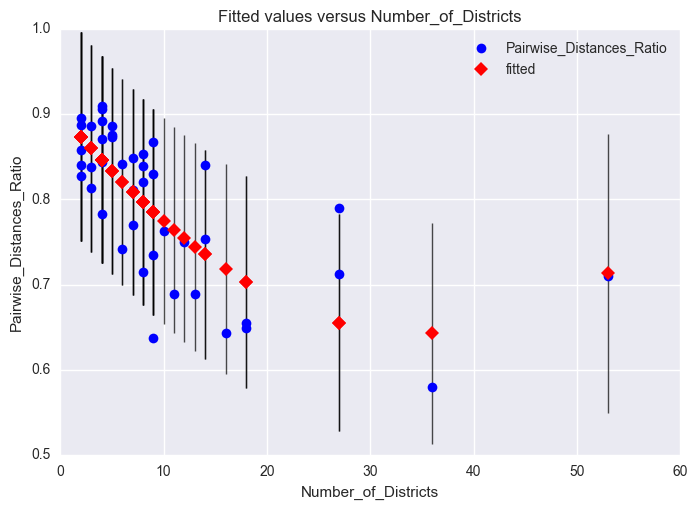

In [6]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(lm, 'Number_of_Districts', ax = ax)
plt.show()

In [7]:
mean_stats_df['Ratio of Mean Pairwise Distance of Clusters versus of Congressional Districts'].mean()

0.795873724728245

In [8]:
mean_stats_df['Ratio of Mean Pairwise Distance of Clusters versus of Congressional Districts'].std()

0.08575902158839085

In [9]:
residuals_df = mean_stats_df[[u'Number of Congressional Districts',
                              u'State',
                              u'Ratio of Mean Pairwise Distance of Clusters versus of Congressional Districts']]
residuals_df.columns = ['Districts', 'State', 'Improvement']
residuals_df['Residuals'] = lm.resid
residuals_df['Fitted Values'] = lm.fittedvalues
assert (residuals_df['Fitted Values'] + residuals_df['Residuals'] == residuals_df['Improvement']).all()
residuals_df.sort_values('Residuals')[['State', 'Residuals']]

,State,Residuals
AZ,AZ,-0.148219
MD,MD,-0.081979
LA,LA,-0.079164
OH,OH,-0.074714
VA,VA,-0.074654
UT,UT,-0.063207
TX,TX,-0.062263
NC,NC,-0.055085
IL,IL,-0.053778
TN,TN,-0.050261


In [10]:
# Create the table in LaTeX:
print(residuals_df.sort_values('Residuals')[['State', 'Residuals']].to_latex(index=False))

\begin{tabular}{lr}
\toprule
State &  Residuals \\
\midrule
   AZ &  -0.148219 \\
   MD &  -0.081979 \\
   LA &  -0.079164 \\
   OH &  -0.074714 \\
   VA &  -0.074654 \\
   UT &  -0.063207 \\
   TX &  -0.062263 \\
   NC &  -0.055085 \\
   IL &  -0.053778 \\
   TN &  -0.050261 \\
   PA &  -0.047522 \\
   WV &  -0.046561 \\
   RI &  -0.045791 \\
   CO &  -0.038613 \\
   ME &  -0.032909 \\
   NM &  -0.022044 \\
   NH &  -0.015757 \\
   WA &  -0.012159 \\
   NJ &  -0.004305 \\
   CA &  -0.003645 \\
   IA &  -0.002213 \\
   AL &   0.002708 \\
   HI &   0.013654 \\
   GA &   0.018082 \\
   KY &   0.020341 \\
   ID &   0.021736 \\
   MO &   0.023865 \\
   AR &   0.024368 \\
   NE &   0.026675 \\
   OR &   0.039917 \\
   SC &   0.040073 \\
   WI &   0.041927 \\
   CT &   0.042559 \\
   MA &   0.043742 \\
   MS &   0.045824 \\
   OK &   0.052660 \\
   MN &   0.056305 \\
   FL &   0.056840 \\
   KS &   0.060334 \\
   NV &   0.062768 \\
   IN &   0.081303 \\
   MI &   0.104665 \\
   NY &   0.1344

In [221]:
residuals_df.to_csv('./fig/csv/improvement.csv')